In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
training_file_path='files_for_ML_random forest/training data/combined_training_data_new.csv'
df1=pd.read_csv(training_file_path)
df1.head()

,g_name,c_name,c_num_of_genes,c_len,c_pct_assemby_len,c_genelenm,c_genelensd,c_pearson_r,c_pearson_p,c_gc_cont,...,taxon_assignment,taxon_assignmentID,is_target,plot_label,plot_labelID,start,end,upstream_gene,downstream_gene,target
0,YAL068C,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Saccharomyces,4930.0,1.0,Saccharomyces,4930.0,1807.0,2169.0,NaN,YAL067W-A,NaN
1,YAL067C,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Saccharomyces,4930.0,1.0,Saccharomyces,4930.0,7235.0,9016.0,YAL067W-A,YAL065C,NaN
2,YAL065C,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Saccharomyces,4930.0,1.0,Saccharomyces,4930.0,11565.0,11951.0,YAL067C,YAL064W-B,NaN
3,YAL064W-B,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Wickerhamomyces anomalus NRRL Y-366-8,683960.0,0.0,Wickerhamomyces anomalus NRRL Y-366-8,683960.0,12046.0,12426.0,YAL065C,YAL064C-A,HGT
4,YAL064C-A,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Saccharomyces,4930.0,1.0,Saccharomyces,4930.0,13363.0,13743.0,YAL064W-B,YAL064W,TG


In [3]:
df1.columns

Index(['g_name', 'c_name', 'c_num_of_genes', 'c_len', 'c_pct_assemby_len',
       'c_genelenm', 'c_genelensd', 'c_pearson_r', 'c_pearson_p', 'c_gc_cont',
       'c_gcdev', 'g_len', 'g_lendev_c', 'g_lendev_o', 'g_abspos',
       'g_terminal', 'g_single', 'g_pearson_r_o', 'g_pearson_p_o',
       'g_pearson_r_c', 'g_pearson_p_c', 'g_gc_cont', 'g_gcdev_c', 'g_gcdev_o',
       'PC_1', 'PC_2', 'PC_3', 'fasta_header', 'best_hit', 'best_hitID',
       'bh_pident', 'bh_evalue', 'bh_bitscore', 'lca', 'lcaID', 'refined_lca',
       'refined_lcaID', 'taxon_assignment', 'taxon_assignmentID', 'is_target',
       'plot_label', 'plot_labelID', 'start', 'end', 'upstream_gene',
       'downstream_gene', 'target'],
      dtype='object')

In [4]:
df1.shape


(669508, 47)

In [5]:
df1['target'].value_counts()

target
TG           536022
Not Found     59788
Unknown       36631
HGT           15969
CT             8928
CR              312
Name: count, dtype: int64

In [6]:
df = df1[(df1['target'] != 'Unknown') & (df1['target'] != 'Not Found')]

In [7]:
print (df['target'].value_counts())
print (df.shape)

target
TG     536022
HGT     15969
CT       8928
CR        312
Name: count, dtype: int64
(573089, 47)


In [8]:
df.head()


,g_name,c_name,c_num_of_genes,c_len,c_pct_assemby_len,c_genelenm,c_genelensd,c_pearson_r,c_pearson_p,c_gc_cont,...,taxon_assignment,taxon_assignmentID,is_target,plot_label,plot_labelID,start,end,upstream_gene,downstream_gene,target
0,YAL068C,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Saccharomyces,4930.0,1.0,Saccharomyces,4930.0,1807.0,2169.0,NaN,YAL067W-A,NaN
1,YAL067C,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Saccharomyces,4930.0,1.0,Saccharomyces,4930.0,7235.0,9016.0,YAL067W-A,YAL065C,NaN
2,YAL065C,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Saccharomyces,4930.0,1.0,Saccharomyces,4930.0,11565.0,11951.0,YAL067C,YAL064W-B,NaN
3,YAL064W-B,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Wickerhamomyces anomalus NRRL Y-366-8,683960.0,0.0,Wickerhamomyces anomalus NRRL Y-366-8,683960.0,12046.0,12426.0,YAL065C,YAL064C-A,HGT
4,YAL064C-A,NC_001133.9,100.0,230218.0,0.0189,1428.11,1150.7168,0.9532,0.0,0.3927,...,Saccharomyces,4930.0,1.0,Saccharomyces,4930.0,13363.0,13743.0,YAL064W-B,YAL064W,TG


In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#fill NaN values with the mean of each column
df.loc[:, numeric_cols] = df.loc[:, numeric_cols].fillna(df.loc[:, numeric_cols].mean())

In [10]:
selected_columns = ['c_num_of_genes', 'c_len', 'c_pct_assemby_len', 'c_genelenm', 'c_genelensd', 'c_pearson_r', 'c_pearson_p', 'c_gc_cont', 'c_gcdev', 'g_len', 'g_lendev_c', 'g_lendev_o', 'g_abspos', 'g_single', 'g_pearson_r_o', 'g_pearson_p_o', 'g_pearson_r_c', 'g_pearson_p_c', 'g_gc_cont', 'g_gcdev_c', 'g_gcdev_o', 'PC_1', 'PC_2', 'PC_3','target']

s
selected_df = df[selected_columns]

In [11]:
selected_df.isna().sum()

c_num_of_genes           0
c_len                    0
c_pct_assemby_len        0
c_genelenm               0
c_genelensd              0
c_pearson_r              0
c_pearson_p              0
c_gc_cont                0
c_gcdev                  0
g_len                    0
g_lendev_c               0
g_lendev_o               0
g_abspos                 0
g_single                 0
g_pearson_r_o            0
g_pearson_p_o            0
g_pearson_r_c            0
g_pearson_p_c            0
g_gc_cont                0
g_gcdev_c                0
g_gcdev_o                0
PC_1                     0
PC_2                     0
PC_3                     0
target               11858
dtype: int64

In [12]:
train_df=selected_df.copy()
train_df.dropna(inplace=True)

In [13]:
train_df.isna().sum()

c_num_of_genes       0
c_len                0
c_pct_assemby_len    0
c_genelenm           0
c_genelensd          0
c_pearson_r          0
c_pearson_p          0
c_gc_cont            0
c_gcdev              0
g_len                0
g_lendev_c           0
g_lendev_o           0
g_abspos             0
g_single             0
g_pearson_r_o        0
g_pearson_p_o        0
g_pearson_r_c        0
g_pearson_p_c        0
g_gc_cont            0
g_gcdev_c            0
g_gcdev_o            0
PC_1                 0
PC_2                 0
PC_3                 0
target               0
dtype: int64

In [14]:
train_df.shape


(561231, 25)

In [15]:
train_df['target'].value_counts()

target
TG     536022
HGT     15969
CT       8928
CR        312
Name: count, dtype: int64

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561231 entries, 3 to 669507
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   c_num_of_genes     561231 non-null  float64
 1   c_len              561231 non-null  float64
 2   c_pct_assemby_len  561231 non-null  float64
 3   c_genelenm         561231 non-null  float64
 4   c_genelensd        561231 non-null  float64
 5   c_pearson_r        561231 non-null  float64
 6   c_pearson_p        561231 non-null  float64
 7   c_gc_cont          561231 non-null  float64
 8   c_gcdev            561231 non-null  float64
 9   g_len              561231 non-null  float64
 10  g_lendev_c         561231 non-null  float64
 11  g_lendev_o         561231 non-null  float64
 12  g_abspos           561231 non-null  float64
 13  g_single           561231 non-null  float64
 14  g_pearson_r_o      561231 non-null  float64
 15  g_pearson_p_o      561231 non-null  float64
 16  g_pears

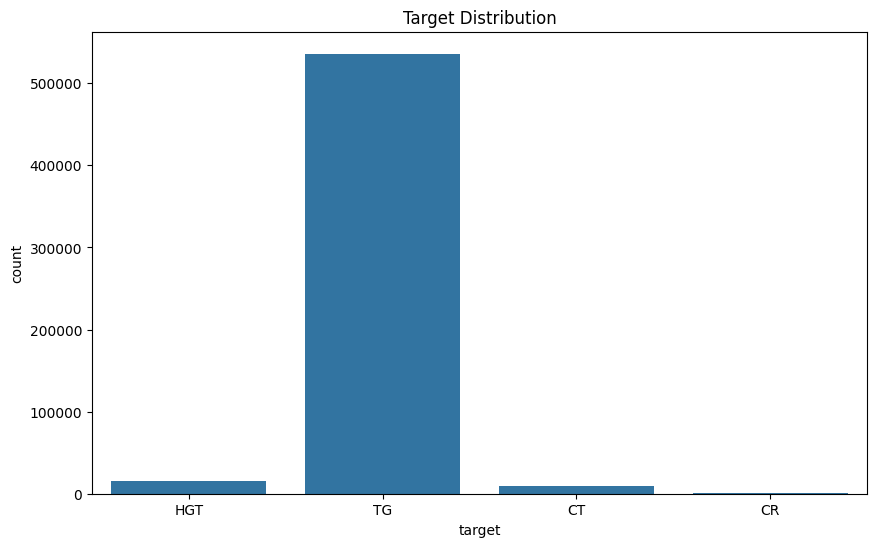

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=train_df)
plt.title('Target Distribution')
plt.show()

In [18]:
target_mapping = {'TG':1,'CT':2,'HGT':3 ,'CR': 4}
train_df['target_encoded'] = train_df['target'].map(target_mapping)

In [19]:
train_df['target_encoded'].value_counts()

target_encoded
1    536022
3     15969
2      8928
4       312
Name: count, dtype: int64

In [20]:
train_df.columns


Index(['c_num_of_genes', 'c_len', 'c_pct_assemby_len', 'c_genelenm',
       'c_genelensd', 'c_pearson_r', 'c_pearson_p', 'c_gc_cont', 'c_gcdev',
       'g_len', 'g_lendev_c', 'g_lendev_o', 'g_abspos', 'g_single',
       'g_pearson_r_o', 'g_pearson_p_o', 'g_pearson_r_c', 'g_pearson_p_c',
       'g_gc_cont', 'g_gcdev_c', 'g_gcdev_o', 'PC_1', 'PC_2', 'PC_3', 'target',
       'target_encoded'],
      dtype='object')

In [21]:
train_df = train_df.drop('target', axis=1) 

In [22]:
selected_columns_nums = ['c_num_of_genes', 'c_len', 'c_pct_assemby_len', 'c_genelenm', 'c_genelensd', 'c_pearson_r', 'c_pearson_p', 'c_gc_cont', 'c_gcdev', 'g_len', 'g_lendev_c', 'g_lendev_o', 'g_abspos', 'g_single', 'g_pearson_r_o', 'g_pearson_p_o', 'g_pearson_r_c', 'g_pearson_p_c', 'g_gc_cont', 'g_gcdev_c', 'g_gcdev_o', 'PC_1', 'PC_2', 'PC_3','target_encoded']

In [23]:
# Function to identify outliers based on IQR
def find_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Looping through all numerical features in the dataframe
outliers_dict = {}
for feature in train_df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = find_outliers(train_df, feature)
    outliers_dict[feature] = len(outliers)
    print(f"{feature} has {len(outliers)} potential outliers")

c_num_of_genes has 29531 potential outliers
c_len has 90006 potential outliers
c_pct_assemby_len has 103866 potential outliers
c_genelenm has 123551 potential outliers
c_genelensd has 130876 potential outliers
c_pearson_r has 82698 potential outliers
c_pearson_p has 7782 potential outliers
c_gc_cont has 2161 potential outliers
c_gcdev has 46992 potential outliers
g_len has 89325 potential outliers
g_lendev_c has 34287 potential outliers
g_lendev_o has 37166 potential outliers
g_abspos has 0 potential outliers
g_single has 11938 potential outliers
g_pearson_r_o has 29570 potential outliers
g_pearson_p_o has 113440 potential outliers
g_pearson_r_c has 28927 potential outliers
g_pearson_p_c has 115945 potential outliers
g_gc_cont has 2689 potential outliers
g_gcdev_c has 21735 potential outliers
g_gcdev_o has 22423 potential outliers
PC_1 has 17119 potential outliers
PC_2 has 14407 potential outliers
PC_3 has 6185 potential outliers
target_encoded has 25209 potential outliers


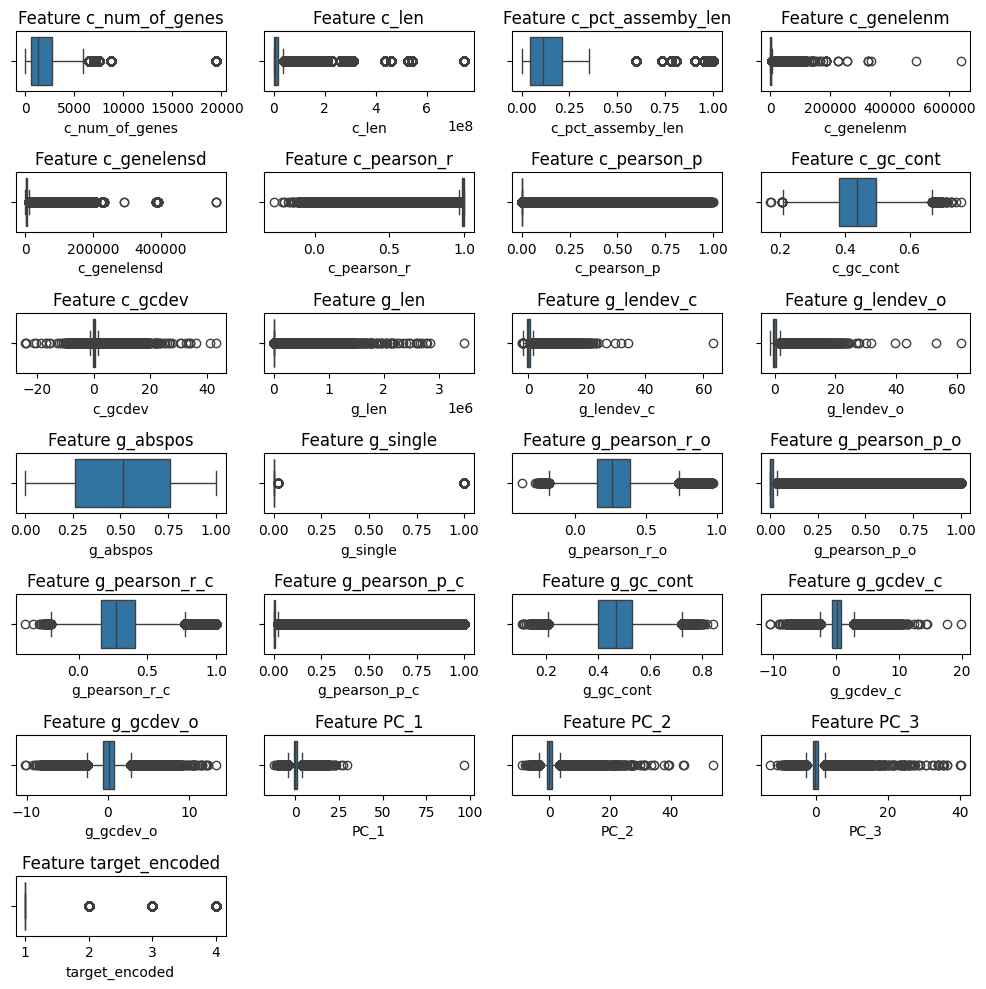

In [24]:

# Calculate the number of rows and columns for the subplots
num_rows = 7
num_cols = 4

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axes array so we can iterate through it easily
axes = axes.flatten()

# Hide empty subplots if any
for i in range(len(selected_columns_nums), len(axes)):
    fig.delaxes(axes[i])

for i in range(len(selected_columns_nums)):
    sns.boxplot(data=train_df, x=train_df[selected_columns_nums[i]], ax=axes[i])
    axes[i].set_title(f"Feature {selected_columns_nums[i]}")

plt.tight_layout()
plt.show()

In [25]:
#potential outliers
columns_with_outliers = ['c_num_of_genes', 'c_len', 'c_pct_assemby_len', 'c_genelenm', 'c_genelensd', 'c_pearson_r', 'c_pearson_p', 'c_gc_cont', 'c_gcdev', 'g_len', 'g_lendev_c', 'g_lendev_o', 'g_abspos', 'g_single', 'g_pearson_r_o', 'g_pearson_p_o', 'g_pearson_r_c', 'g_pearson_p_c', 'g_gc_cont', 'g_gcdev_c', 'g_gcdev_o', 'PC_1', 'PC_2', 'PC_3']

#handle outliers using IQR method with capping
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, np.where(df[column] > upper_bound, upper_bound, df[column]))


for column in columns_with_outliers:
    handle_outliers(train_df, column)
#outliers replaced with Capping method.

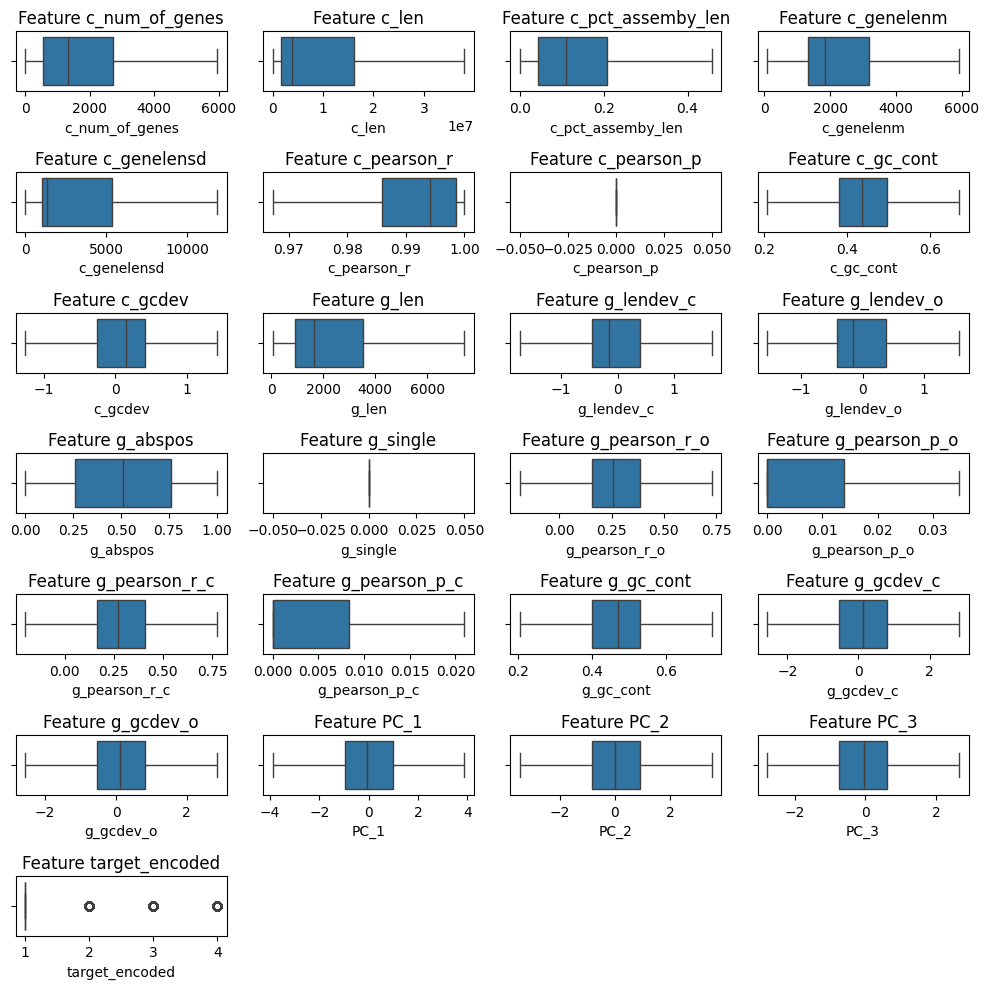

In [26]:


num_rows = 7
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

#fflatten the axes array so we can iterate through it easily
axes = axes.flatten()
for i in range(len(selected_columns_nums), len(axes)):
    fig.delaxes(axes[i])

for i in range(len(selected_columns_nums)):
    sns.boxplot(data=train_df, x=train_df[selected_columns_nums[i]], ax=axes[i])
    axes[i].set_title(f"Feature {selected_columns_nums[i]}")

plt.tight_layout()
plt.show()

In [27]:
X = train_df.drop('target_encoded', axis=1)
y = train_df['target_encoded']



In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_resampled)
X_resampled_scaled = scaler.transform(X_resampled)

In [30]:
#class distribution after balancing
print("\nClass distribution after balancing:")
print(pd.Series(y_resampled).value_counts())


Class distribution after balancing:
target_encoded
3    536022
1    536022
2    536022
4    536022
Name: count, dtype: int64


In [31]:
y_resampled.shape

(2144088,)

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled_scaled, y_resampled) 


RandomForestClassifier(random_state=42)

In [39]:
testing_file_path='GCF_11111.csv'
df2=pd.read_csv(testing_file_path)
df2.head()

,g_name,c_name,c_num_of_genes,c_len,c_pct_assemby_len,c_genelenm,c_genelensd,c_cov_7,c_cov_8,c_covsd_7,...,taxon_assignment,taxon_assignmentID,is_target,plot_label,plot_labelID,start,end,upstream_gene,downstream_gene,Target
0,FUN_09832,scaffold_29,6,93177,0.0028,1088.3333,600.1327,46.0933,207.4546,18.6356,...,Trebouxia sp. A1-2,2608996.0,0,Trebouxia sp. A1-2,2608996.0,7962,8402,NaN,FUN_09833,Unknown
1,FUN_09834,scaffold_29,6,93177,0.0028,1088.3333,600.1327,46.0933,207.4546,18.6356,...,OSLEUM clade,1520881.0,1,Ascomycota,4890.0,51158,52268,FUN_09833,FUN_09835,Unknown
2,FUN_09835,scaffold_29,6,93177,0.0028,1088.3333,600.1327,46.0933,207.4546,18.6356,...,leotiomyceta,716546.0,1,Ascomycota,4890.0,54200,55499,FUN_09834,FUN_09836,Unknown
3,FUN_09836,scaffold_29,6,93177,0.0028,1088.3333,600.1327,46.0933,207.4546,18.6356,...,leotiomyceta,716546.0,1,Ascomycota,4890.0,56358,58614,FUN_09835,FUN_09837,Unknown
4,FUN_09837,scaffold_29,6,93177,0.0028,1088.3333,600.1327,46.0933,207.4546,18.6356,...,OSLEUM clade,1520881.0,1,Ascomycota,4890.0,59208,60068,FUN_09836,NaN,Unknown


In [40]:
df2.shape


(8665, 65)

In [41]:
df2['Target'].value_counts()

Target
TG           4204
Unknown      1857
Not Found    1534
HGT           889
CR             11
CT              9
Name: count, dtype: int64

In [42]:
df = df2[(df2['Target'] != 'Unknown') & (df2['Target'] != 'Not Found') & (df2['Target'] != 'CRT') & (df2['Target'] != 'Taxaminar not available') & (df2['Target'] != 'Target genes')]

In [43]:
df['Target'].value_counts()

Target
TG     4204
HGT     889
CR       11
CT        9
Name: count, dtype: int64

In [44]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


df.loc[:, numeric_cols] = df.loc[:, numeric_cols].fillna(df.loc[:, numeric_cols].mean())

In [45]:
selected_columns = ['c_num_of_genes', 'c_len', 'c_pct_assemby_len', 'c_genelenm', 'c_genelensd', 'c_pearson_r', 'c_pearson_p', 'c_gc_cont', 'c_gcdev', 'g_len', 'g_lendev_c', 'g_lendev_o', 'g_abspos', 'g_single', 'g_pearson_r_o', 'g_pearson_p_o', 'g_pearson_r_c', 'g_pearson_p_c', 'g_gc_cont', 'g_gcdev_c', 'g_gcdev_o', 'PC_1', 'PC_2', 'PC_3','Target']


selected_df = df[selected_columns]

In [46]:
selected_df.isna().sum()

c_num_of_genes         0
c_len                  0
c_pct_assemby_len      0
c_genelenm             0
c_genelensd            0
c_pearson_r            0
c_pearson_p            0
c_gc_cont              0
c_gcdev                0
g_len                  0
g_lendev_c             0
g_lendev_o             0
g_abspos               0
g_single               0
g_pearson_r_o          0
g_pearson_p_o          0
g_pearson_r_c          0
g_pearson_p_c          0
g_gc_cont              0
g_gcdev_c              0
g_gcdev_o              0
PC_1                   0
PC_2                   0
PC_3                   0
Target               161
dtype: int64

In [47]:
test_df=selected_df.copy()
test_df.dropna(inplace=True)

In [48]:
test_df.isna().sum()

c_num_of_genes       0
c_len                0
c_pct_assemby_len    0
c_genelenm           0
c_genelensd          0
c_pearson_r          0
c_pearson_p          0
c_gc_cont            0
c_gcdev              0
g_len                0
g_lendev_c           0
g_lendev_o           0
g_abspos             0
g_single             0
g_pearson_r_o        0
g_pearson_p_o        0
g_pearson_r_c        0
g_pearson_p_c        0
g_gc_cont            0
g_gcdev_c            0
g_gcdev_o            0
PC_1                 0
PC_2                 0
PC_3                 0
Target               0
dtype: int64

In [49]:
test_df.shape

(5113, 25)

In [50]:
test_df['Target'].value_counts()

Target
TG     4204
HGT     889
CR       11
CT        9
Name: count, dtype: int64

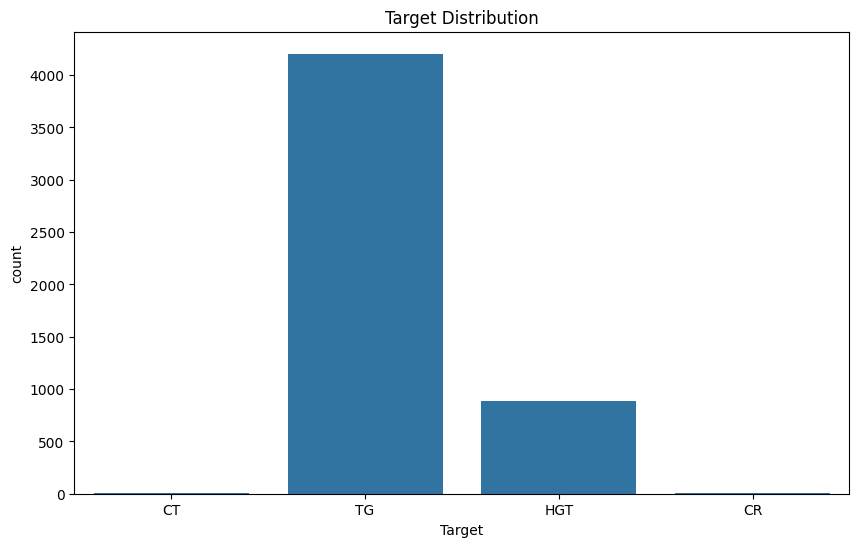

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=test_df)
plt.title('Target Distribution')
plt.show()

In [52]:
target_mapping = {'TG':1,'CT':2,'HGT':3 ,'CR': 4}
test_df['target_encoded'] = test_df['Target'].map(target_mapping)
test_df.head()

,c_num_of_genes,c_len,c_pct_assemby_len,c_genelenm,c_genelensd,c_pearson_r,c_pearson_p,c_gc_cont,c_gcdev,g_len,...,g_pearson_r_c,g_pearson_p_c,g_gc_cont,g_gcdev_c,g_gcdev_o,PC_1,PC_2,PC_3,Target,target_encoded
10,4,28560,0.0009,479.75,77.856800,0.4075,0.0,0.5062,-1.1652,579,...,0.3578,0.0000,0.5440,0.675900,0.2250,-5.776389,-20.334584,6.172398,CT,2
11,4,28560,0.0009,479.75,77.856800,0.4075,0.0,0.5062,-1.1652,366,...,0.0997,0.1228,0.5546,1.204500,0.4957,-5.675875,-19.354594,6.947685,CT,2
12,4,28560,0.0009,479.75,77.856800,0.4075,0.0,0.5062,-1.1652,461,...,0.0325,0.6108,0.5271,-0.168000,-0.2071,-6.309911,-21.590904,7.410893,CT,2
13,1,18507,0.0006,534.00,1208.445955,0.3334,0.0,0.5268,1.1243,534,...,0.1231,0.0646,0.5581,0.164092,0.5827,-8.017457,-19.203351,7.921625,CT,2
14,6,17195,0.0005,1161.50,1027.227500,0.3226,0.0,0.5043,-1.3713,791,...,0.2868,0.0000,0.4867,-0.811100,-1.2381,-8.943936,-17.432678,7.975028,TG,1


In [53]:
test_df = test_df.drop('Target', axis=1) 

In [54]:
X = test_df.drop('target_encoded', axis=1)
y_true = test_df['target_encoded']
X_scaled = scaler.transform(X)

In [55]:

y_pred = rf_model.predict(X_scaled)


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='weighted'))
print("Recall:", recall_score(y_true, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Accuracy: 0.8185018580089967
Precision: 0.7016714827300583
Recall: 0.8185018580089967
F1 Score: 0.7416031139725133

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.99      0.90      4204
           2       0.00      0.00      0.00         9
           3       0.15      0.00      0.01       889
           4       0.00      0.00      0.00        11

    accuracy                           0.82      5113
   macro avg       0.24      0.25      0.23      5113
weighted avg       0.70      0.82      0.74      5113



/Users/dev/work/test_docker/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dev/work/test_docker/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/dev/work/test_docker/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [68]:
target_mapping

{'TG': 1, 'CT': 2, 'HGT': 3, 'CR': 4}

In [80]:
inverse_mapping = {v: k for k, v in target_mapping.items()}
mapped_y_true = np.array([inverse_mapping[val] for val in y_true])
mapped_y_pred = np.array([inverse_mapping[val] for val in y_pred])
tick_labels = sorted(set(mapped_y_true) | set(mapped_y_pred))


In [81]:
cm = confusion_matrix(mapped_y_true, mapped_y_pred)

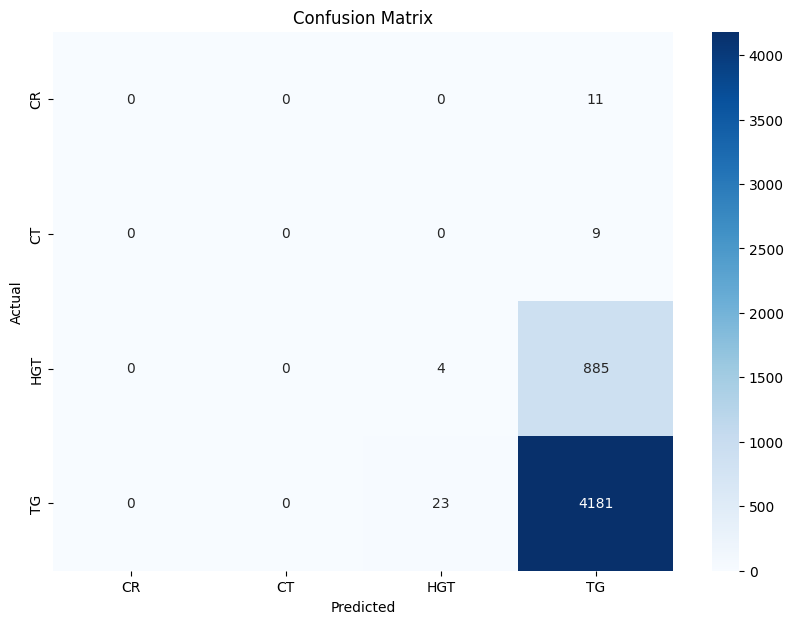

In [82]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=tick_labels, yticklabels=tick_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()